In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\HP\Downloads\churn_analysis.csv")
print(df.head(5))

   customerID  gender  SeniorCitizen IsSenior Partner Dependents  tenure  \
0  7590-VHVEG  Female              0       No     Yes         No       1   
1  5575-GNVDE    Male              0       No      No         No      34   
2  3668-QPYBK    Male              0       No      No         No       2   
3  7795-CFOCW    Male              0       No      No         No      45   
4  9237-HQITU  Female              0       No      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No       

In [16]:

print(df.columns)
df['gender']=df['gender'].map({'Male'

Index(['customerID', 'gender', 'SeniorCitizen', 'IsSenior', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [4]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df.head(5))

   customerID  gender  SeniorCitizen IsSenior Partner Dependents  tenure  \
0  7590-VHVEG  Female              0       No     Yes         No       1   
1  5575-GNVDE    Male              0       No      No         No      34   
2  3668-QPYBK    Male              0       No      No         No       2   
3  7795-CFOCW    Male              0       No      No         No      45   
4  9237-HQITU  Female              0       No      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No       

In [5]:
import numpy as np
np.random.seed(42)
df['last_login_days_ago'] = np.random.randint(0, 60, size=len(df))
df['support_tickets_last_30_days'] = np.random.randint(0, 6, size=len(df))
df['plan_change_recently'] = np.random.choice(['Yes', 'No'], size=len(df))
df['discount_used_last_month'] = np.random.choice(['Yes', 'No'], size=len(df))
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'IsSenior', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'last_login_days_ago', 'support_tickets_last_30_days',
       'plan_change_recently', 'discount_used_last_month'],
      dtype='object')


In [6]:
churn_rate_contract= df.groupby('Contract')['Churn'].mean()
revenue_internet_service= df.groupby('InternetService')['MonthlyCharges'].mean()
print("The churn rate for each type of contract:",churn_rate_contract)
print("The average monthly revenue generated by each type of internet service:",revenue_internet_service)

The churn rate for each type of contract: Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64
The average monthly revenue generated by each type of internet service: InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64


In [7]:
churn_rate = df['Churn'].mean()
avg_revenue = df['MonthlyCharges'].mean()
expected_loss = churn_rate * avg_revenue * len(df)
print("What percentage of customers are churning on average?", churn_rate)
print("What is the average monthly revenue per customer?",avg_revenue)
print("How much monthly revenue is expected to be lost due to customer churn?", expected_loss)

What percentage of customers are churning on average? 0.26578498293515357
What is the average monthly revenue per customer? 64.79820819112628
How much monthly revenue is expected to be lost due to customer churn? 121107.85110921501


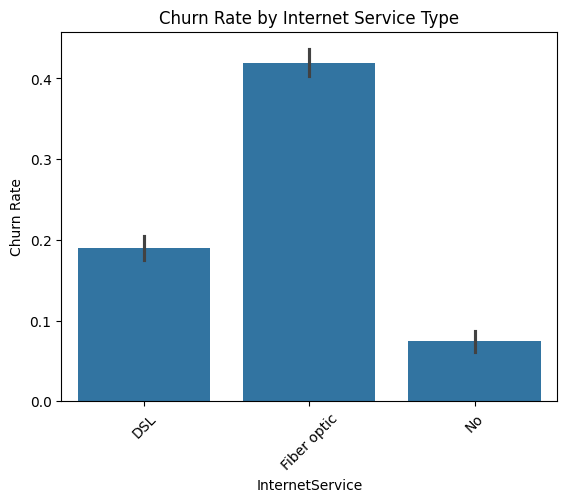

In [8]:
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


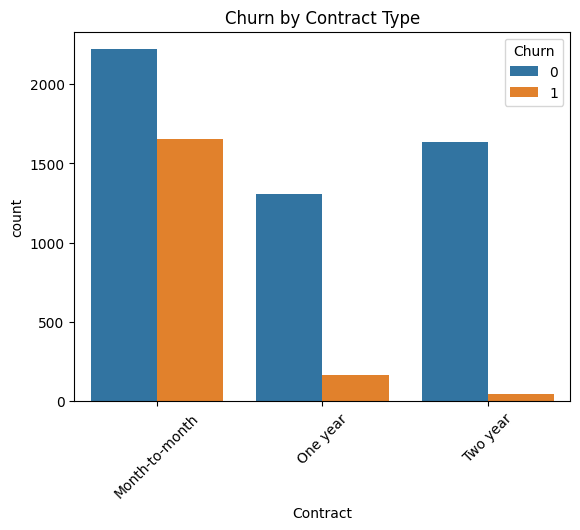

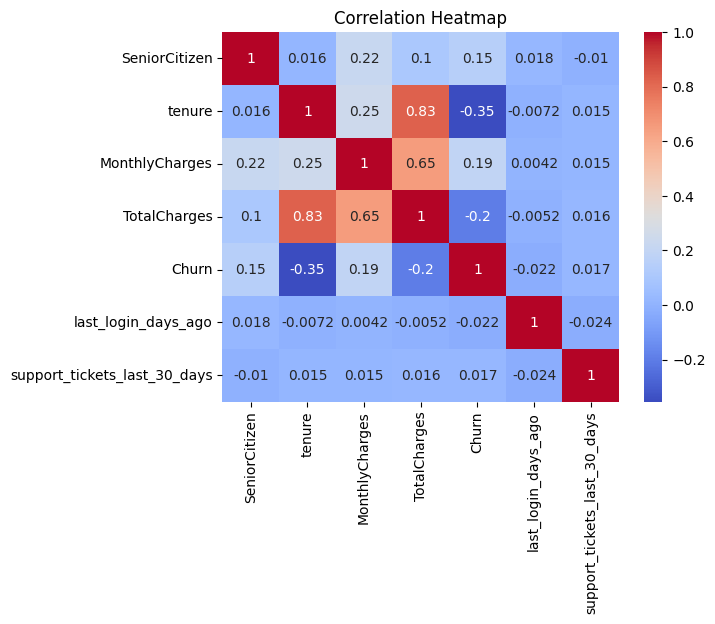

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\HP\Downloads\churn_analysis.csv")
import sqlite3
conn = sqlite3.connect("churn_analysis.db")
df.to_sql("churn_analysis", conn, if_exists="replace", index=False)


7032

C:\Users\HP\AppData\Local\Temp\ipykernel_14996\52797220.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=login_df, x='Login_Activity', y='Churn_Rate_Percent', palette='magma')


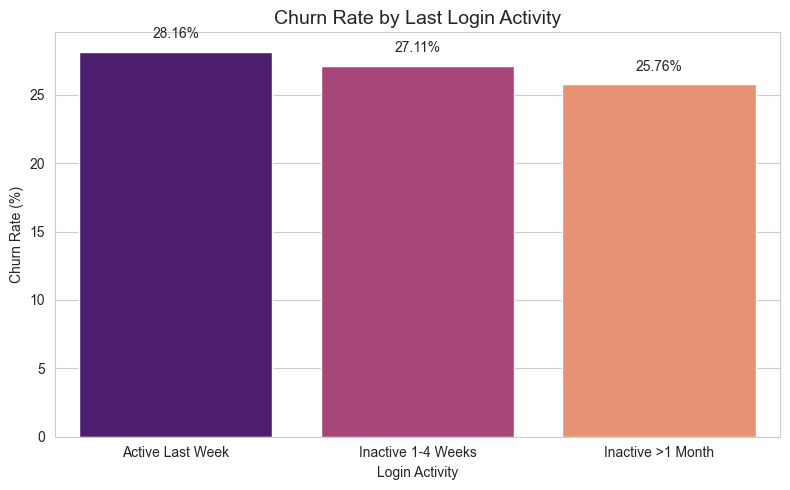

In [11]:
login_df = pd.DataFrame({
    'Login_Activity': ['Active Last Week', 'Inactive 1-4 Weeks', 'Inactive >1 Month'],
    'total_customers': [902, 2671, 3459],
    'Churn_Rate_Percent': [28.16, 27.11, 25.76]
})
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(data=login_df, x='Login_Activity', y='Churn_Rate_Percent', palette='magma')
plt.title('Churn Rate by Last Login Activity', fontsize=14)
plt.xlabel('Login Activity')
plt.ylabel('Churn Rate (%)')
for index, row in login_df.iterrows():
    plt.text(index, row.Churn_Rate_Percent + 1, f"{row.Churn_Rate_Percent:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [12]:
import sqlite3

# Create or connect to a file-based DB
conn = sqlite3.connect("churn_analysis.sqlite")

# Save your table if not already saved
df.to_sql("churn_analysis", conn, if_exists="replace", index=False)
conn.commit()
conn.close()


In [13]:
import sqlite3

# Full path to a valid .db file location
db = r"C:\Users\HP\Desktop\churn_analysis.db"

# Create or connect to the SQLite file
conn = sqlite3.connect(db)
print("Database connected successfully.")
conn.commit()



Database connected successfully.


In [14]:
# Assuming you already have a connection 'conn' established
df.to_sql('churn_analysis', conn, if_exists='replace', index=False)


7032

In [15]:

query = """ 
SELECT
  support_tickets_last_30_days,
  COUNT(*) AS Total_Customers,
  ROUND(AVG(Churn) * 100, 2) AS Churn_Rate_Percent
FROM churn_analysis
GROUP BY support_tickets_last_30_days
ORDER BY support_tickets_last_30_days;

"""
print(pd.read_sql(query, conn))

DatabaseError: Execution failed on sql ' 
SELECT
  support_tickets_last_30_days,
  COUNT(*) AS Total_Customers,
  ROUND(AVG(Churn) * 100, 2) AS Churn_Rate_Percent
FROM churn_analysis
GROUP BY support_tickets_last_30_days
ORDER BY support_tickets_last_30_days;

': no such column: support_tickets_last_30_days

In [ ]:
print(df['Churn'].value_counts())


In [ ]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df.head(5))

In [ ]:
df.to_sql('churn_analysis', conn, if_exists='replace', index=False)


In [ ]:
query = """ 
SELECT
  support_tickets_last_30_days,
  COUNT(*) AS Total_Customers,
  ROUND(AVG(Churn) * 100, 2) AS Churn_Rate_Percent
FROM churn_analysis
GROUP BY support_tickets_last_30_days
ORDER BY support_tickets_last_30_days;

"""
print(pd.read_sql(query, conn))

In [ ]:
query = """ select CASE 
    WHEN last_login_days_ago <= 7 THEN 'Active Last Week'
    WHEN last_login_days_ago <= 30 THEN 'Inactive 1-4 Weeks'
    ELSE 'Inactive >1 Month'
  END AS Login_Activity, count(*) as total_customers, 
ROUND(AVG(Churn) * 100, 2) AS Churn_Rate_Percent
FROM churn_analysis
group by Login_Activity;
"""
print(pd.read_sql(query, conn))

In [ ]:
query = """ select contract, count(*) as customers, sum(case when churn = 1 then MonthlyCharges else 0 end) as lost_revenue
from churn_analysis 
group by contract;"""
print(pd.read_sql(query, conn))

In [ ]:
query = """
SELECT 
  CASE 
    WHEN tenure <= 6 THEN '0-6 Months'
    WHEN tenure <= 12 THEN '7-12 Months'
    WHEN tenure <= 24 THEN '13-24 Months'
    ELSE '2+ Years'
  END AS tenure_group,
  COUNT(*) AS total_customers,
  SUM(churn) AS customers_churned,
  ROUND(AVG(churn) * 100, 2) AS churn_rate
FROM churn_analysis
GROUP BY tenure_group;



"""
print(pd.read_sql(query, conn))

In [ ]:
query = """ SELECT Churn, AVG(Tenure) AS avg_tenure
FROM churn_analysis
GROUP BY Churn;
"""
print(pd.read_sql(query, conn))

In [ ]:
query = """ SELECT CustomerID, Tenure, last_login_days_ago, support_tickets_last_30_days
FROM churn_analysis
WHERE Churn = 1
  AND last_login_days_ago > 30
  AND support_tickets_last_30_days > 3;"""
print(pd.read_sql(query, conn))

In [ ]:
print(df.head())

In [ ]:
import numpy as np
np.random.seed(42)
df['last_login_days_ago'] = np.random.randint(0, 60, size=len(df))
df['support_tickets_last_30_days'] = np.random.randint(0, 6, size=len(df))
df['plan_change_recently'] = np.random.choice(['Yes', 'No'], size=len(df))
df['discount_used_last_month'] = np.random.choice(['Yes', 'No'], size=len(df))

In [ ]:
print(df.head())

In [ ]:
df.to_csv('churn_analysis.csv', index=False)


In [ ]:
import os
os.getcwd()
